In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot styling (Kaggle-friendly)
sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

# -------------------------
# Load Dataset (Kaggle Path)
# -------------------------
DATA_PATH = "/kaggle/input/nasa-battery-cycle-level-dataset/battery_cycle_level_dataset_CLEAN_FINAL.csv"

df = pd.read_csv(DATA_PATH)

In [2]:
print(df.head())
print(df.info())

print("\nTotal batteries:", df['battery_id'].nunique())
print("Total cycles:", len(df))

print("\nCycles per battery:")
print(df.groupby('battery_id')['cycle'].max().describe())


  battery_id  cycle   voltage  temperature  capacity       soh  rul
0      B0005      1  3.532781    32.536891  1.861976  1.000000  167
1      B0005      2  3.542968    32.643595  1.851862  0.994568  166
2      B0005      3  3.553056    32.522526  1.840808  0.988631  165
3      B0005      4  3.545849    32.492083  1.850058  0.993599  164
4      B0005      5  3.544456    32.368612  1.849432  0.993263  163
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415 entries, 0 to 1414
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   battery_id   1415 non-null   object 
 1   cycle        1415 non-null   int64  
 2   voltage      1415 non-null   float64
 3   temperature  1415 non-null   float64
 4   capacity     1415 non-null   float64
 5   soh          1415 non-null   float64
 6   rul          1415 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 77.5+ KB
None

Total batteries: 34
Total cycles: 1415


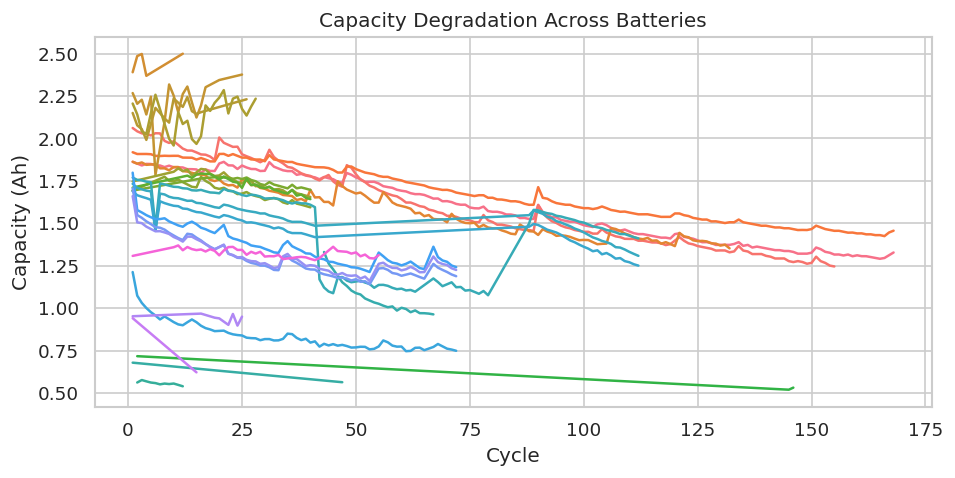

In [3]:
# -------------------------
# Capacity Degradation
# -------------------------
plt.figure(figsize=(9,4))
sns.lineplot(
    data=df,
    x='cycle',
    y='capacity',
    hue='battery_id',
    legend=False
)
plt.xlabel("Cycle")
plt.ylabel("Capacity (Ah)")
plt.title("Capacity Degradation Across Batteries")
plt.show()


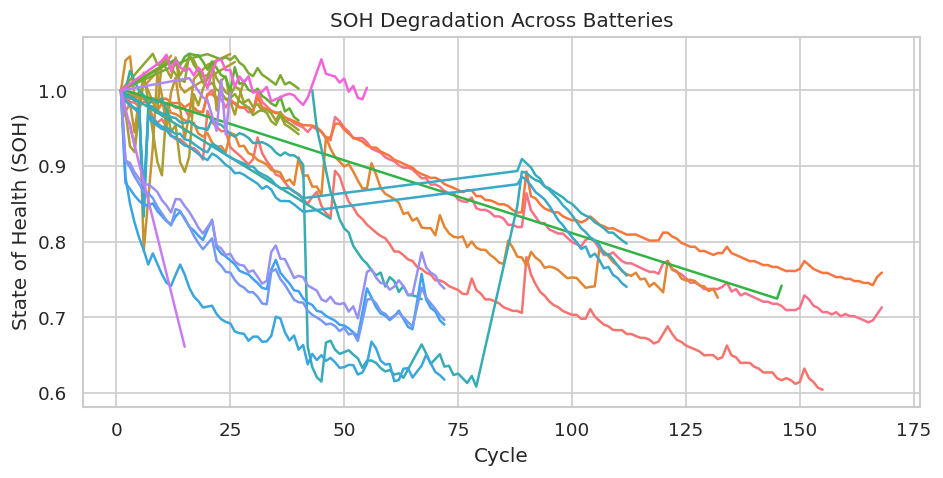

In [4]:
# -------------------------
# SOH Degradation
# -------------------------
plt.figure(figsize=(9,4))
sns.lineplot(
    data=df,
    x='cycle',
    y='soh',
    hue='battery_id',
    legend=False
)
plt.xlabel("Cycle")
plt.ylabel("State of Health (SOH)")
plt.title("SOH Degradation Across Batteries")
plt.show()


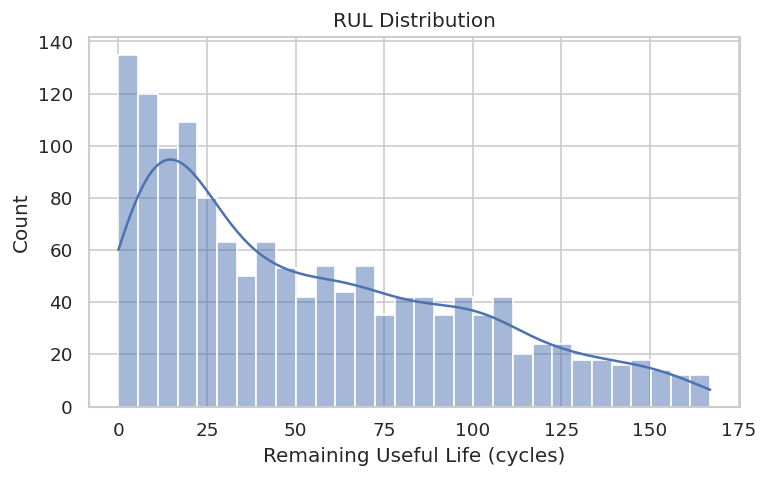

In [5]:

# -------------------------
# RUL Distribution
# -------------------------
plt.figure(figsize=(7,4))
sns.histplot(df['rul'], bins=30, kde=True)
plt.xlabel("Remaining Useful Life (cycles)")
plt.title("RUL Distribution")
plt.show()

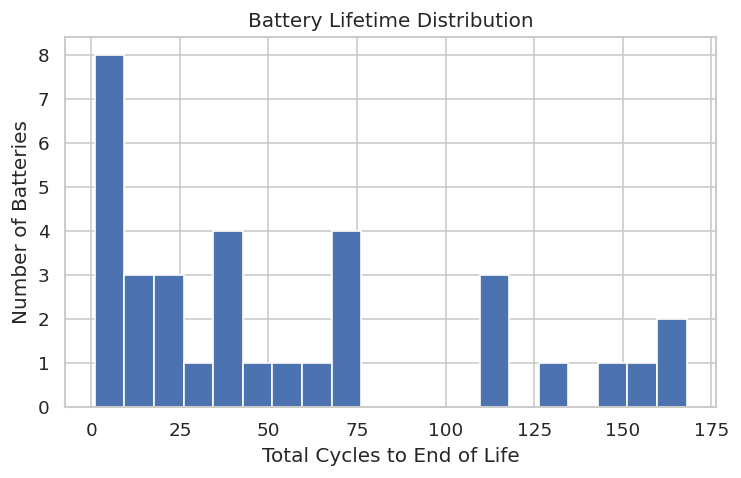

In [6]:

# -------------------------
# Battery Lifetime Distribution
# -------------------------
life = df.groupby('battery_id')['cycle'].max()

plt.figure(figsize=(7,4))
plt.hist(life, bins=20)
plt.xlabel("Total Cycles to End of Life")
plt.ylabel("Number of Batteries")
plt.title("Battery Lifetime Distribution")
plt.show()


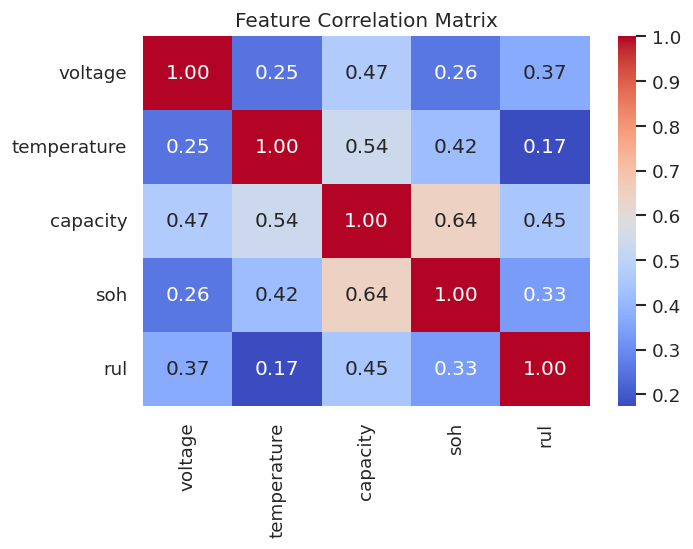

In [7]:
# -------------------------
# Correlation Analysis
# -------------------------
plt.figure(figsize=(6,4))
sns.heatmap(
    df[['voltage', 'temperature', 'capacity', 'soh', 'rul']].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Feature Correlation Matrix")
plt.show()

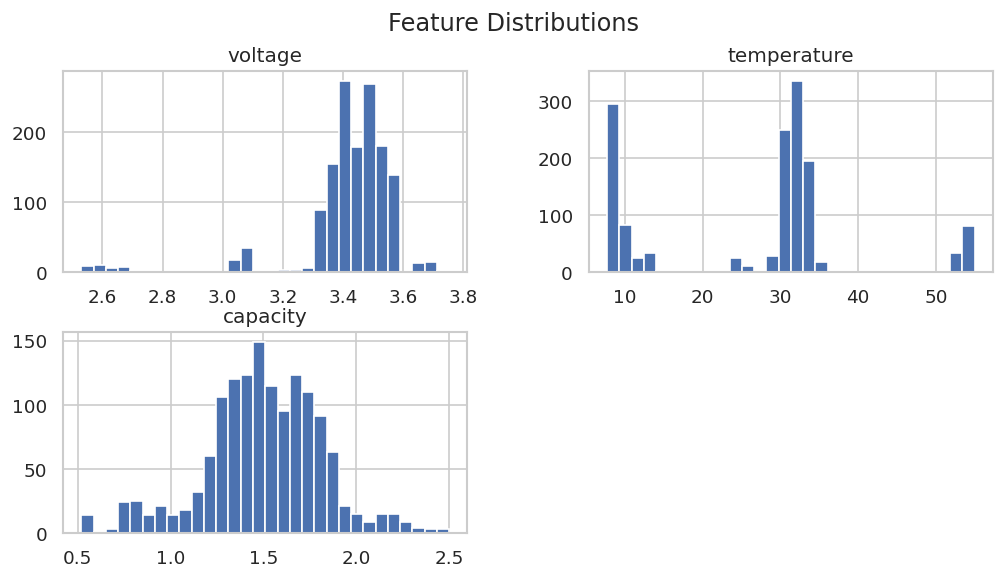

In [8]:

# -------------------------
# Feature Distributions
# -------------------------
df[['voltage', 'temperature', 'capacity']].hist(
    bins=30, figsize=(10,5)
)
plt.suptitle("Feature Distributions")
plt.show()


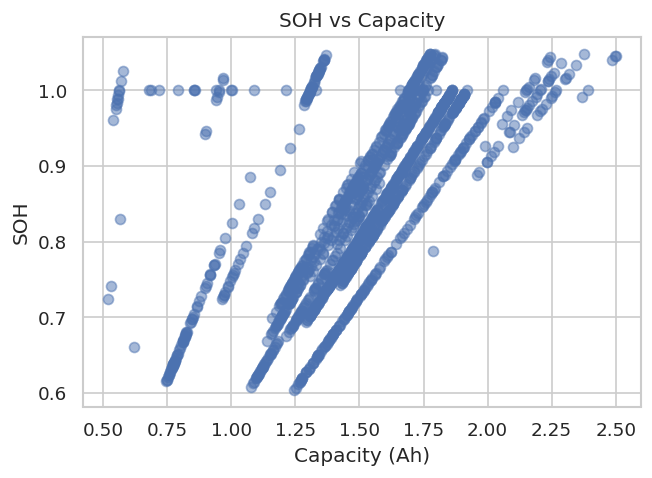

In [9]:

# -------------------------
# SOH vs Capacity
# -------------------------
plt.figure(figsize=(6,4))
plt.scatter(df['capacity'], df['soh'], alpha=0.5)
plt.xlabel("Capacity (Ah)")
plt.ylabel("SOH")
plt.title("SOH vs Capacity")
plt.grid(True)
plt.show()


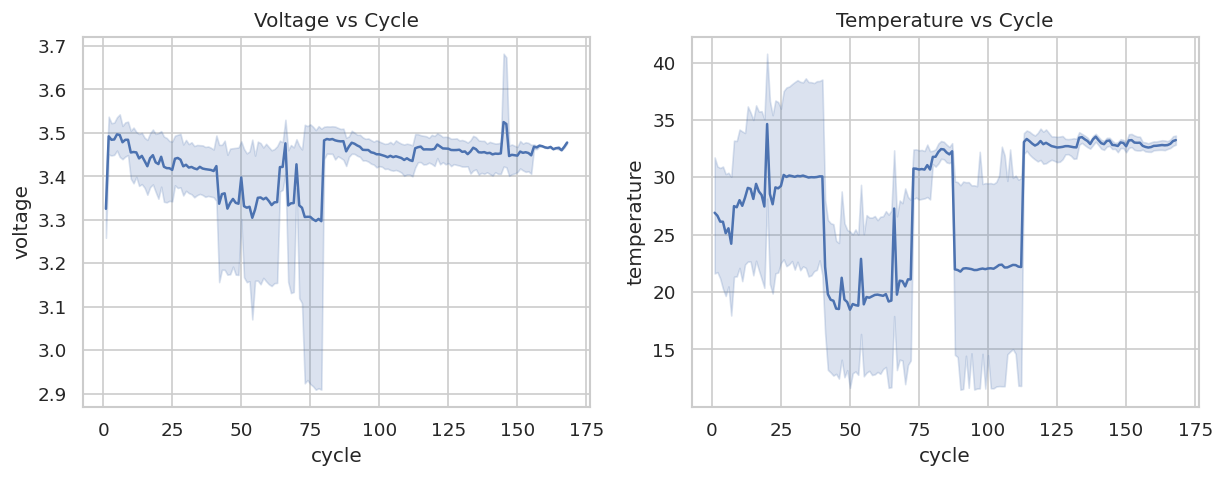

In [10]:
# -------------------------
# Voltage & Temperature Trends
# -------------------------
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.lineplot(data=df, x='cycle', y='voltage', ax=ax[0])
ax[0].set_title("Voltage vs Cycle")

sns.lineplot(data=df, x='cycle', y='temperature', ax=ax[1])
ax[1].set_title("Temperature vs Cycle")

plt.show()


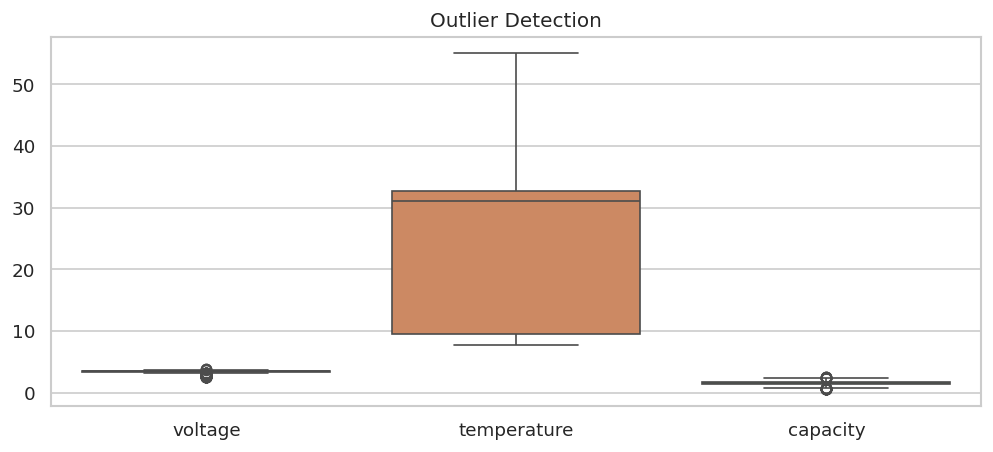

In [11]:
# -------------------------
# Outlier Detection
# -------------------------
plt.figure(figsize=(10,4))
sns.boxplot(data=df[['voltage', 'temperature', 'capacity']])
plt.title("Outlier Detection")
plt.show()


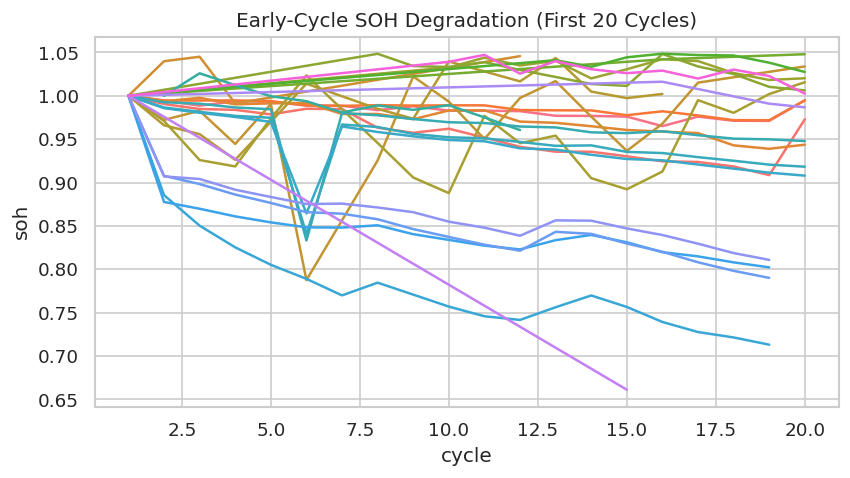

In [12]:
# -------------------------
# Early-Cycle SOH Behavior
# -------------------------
early_df = df[df['cycle'] <= 20]

plt.figure(figsize=(8,4))
sns.lineplot(
    data=early_df,
    x='cycle',
    y='soh',
    hue='battery_id',
    legend=False
)
plt.title("Early-Cycle SOH Degradation (First 20 Cycles)")
plt.show()
